In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xf flower_photos.tgz

--2025-04-02 08:11:20--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   139MB/s    in 1.6s    

2025-04-02 08:11:22 (139 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



Flower Categories: ['daisy', 'sunflowers', 'dandelion', 'LICENSE.txt', 'tulips', 'roses']
Total images in 'roses': 641


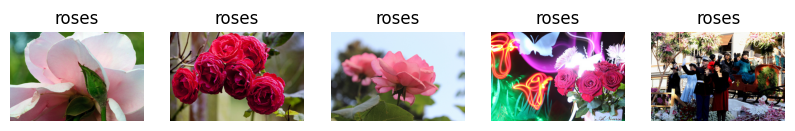

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset
dataset_path = "flower_photos"

# Get the list of flower categories
categories = os.listdir(dataset_path)

# Print available flower categories
print("Flower Categories:", categories)

# Select a category (e.g., "daisy")
category = "roses"
category_path = os.path.join(dataset_path, category)

# Get a list of image files in the category
image_files = os.listdir(category_path)

# Print total images in the category
print(f"Total images in '{category}':", len(image_files))

# Display the first 5 images
plt.figure(figsize=(10, 5))

for i in range(5):
    img_path = os.path.join(category_path, image_files[i])
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)

plt.show()


Found 3670 files belonging to 5 classes.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


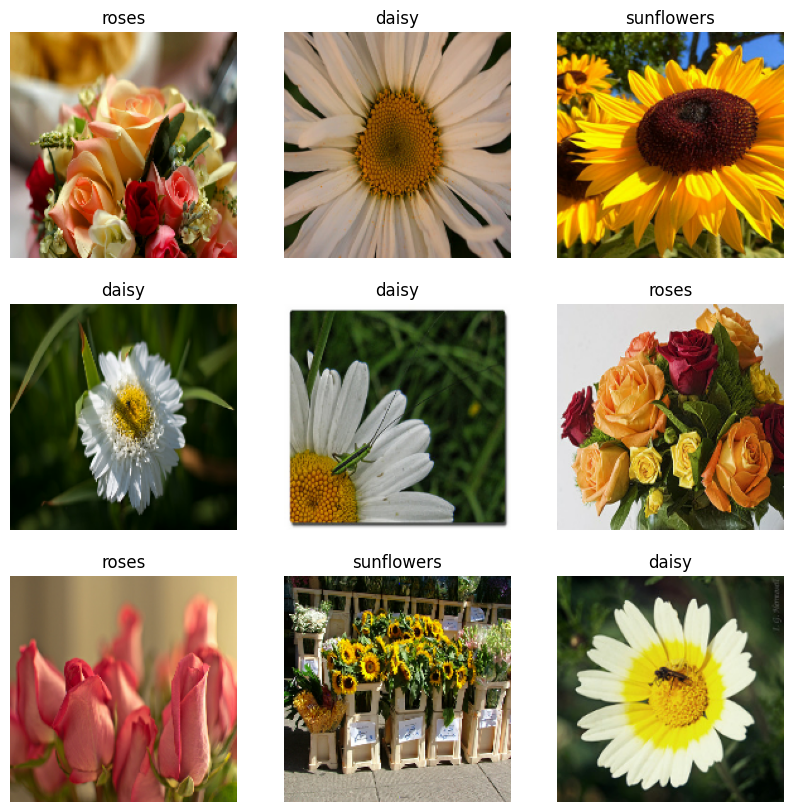

In [ ]:
import tensorflow as tf
import pathlib

# Convert dataset path to pathlib format
data_dir = pathlib.Path(dataset_path)

# Load images with TensorFlow
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Display a batch of images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    break  # Stop after one batch

plt.show()


In [ ]:
print(data_dir)

flower_photos


In [ ]:
img_height, img_width= 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os

In [4]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'flower_photos',  # Replace with actual path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Since we have only two classes (cats & dogs)
    shuffle=False  # Important for consistent feature extraction
)

Found 3670 images belonging to 5 classes.


In [6]:
features = model.predict(train_generator)
features = features.reshape(features.shape[0], -1)  # Flatten features

# Labels
labels = train_generator.classes

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 277ms/step


In [7]:
labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [10]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.92%
